<h2>Analysis 8. Correlations between editing in adjacent sites</h2>
<p>Using the available RNAseq read data, we calculate correlations between the occurances of edited states on reads mapped onto the transcriptomes:</p>

$$ r_{i,j} = \frac{f_{i,j}^{AA}f_{i,j}^{GG} - f_{i,j}^{AG}f_{i,j}^{GA}}{\sqrt{f_i^A f_j^A f_i^G f_j^G}} $$

<p>Where $f_{i,j}^{N_1 N_2}$ are frequencies of co-occurencies of nucleotides $N_1$ and $N_2$ on the same read in positions $i$ and $j$ and $f_i^N$ are frequencies of the occurancies of the nucleotide $N$ in position $i$.</p>

<p>Next, we calculate the distributions of calculated $r$ values for specified $j-i$ distance ranges</p>
<p>The code works with the output of the script read_correl_count.py, that in turn utilizes the script call_edsite_variants.py which deals with raw .sam files containing read mapping data</p>


In [1]:
import numpy as np
from scipy import stats
from editing_adlib import *
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def exp_fit(means_arr, ranges_arr):
#
    l_ranges = np.log(ranges_arr) #ranges_arr # #
#
    l_means = np.log(means_arr)
    gradient, intercept, r_value, p_value, std_err = stats.linregress(l_ranges, l_means)
    print(gradient, intercept)
    x = np.array(l_ranges).astype(np.float64)
    y = gradient*x + intercept
    plt.plot(list(range(len(ranges_arr))), np.exp(y), color="blue")
    plt.plot(list(range(len(ranges_arr))), np.exp(l_means), color="black")
    
    R = np.corrcoef(means_arr, y)
    print("R", R, "R^2", R*R)


def correl_dist(read_correl_file, 
                edsite_crd_dict,
                figname,
                pval_thr=0.01, 
                el_both_thr=0, 
                el_max_thr=0,
                log_fig=False):
    
    ranges = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
    bonf_corr = len(ranges)
    list_vals = []
    means = []
    for i in ranges:
        list_vals.append([])
    for s in open(read_correl_file):
        s = s.strip().split()
        if not edsite_crd_dict.get(s[0]):
            continue
        if not edsite_crd_dict[s[0]].get(eval(s[1])):
            continue
        if not edsite_crd_dict[s[0]].get(eval(s[2])):
            continue
        el1 = eval(edsite_crd_dict[s[0]][eval(s[1])][7])
        el2 = eval(edsite_crd_dict[s[0]][eval(s[2])][7])
        if el1 < el_both_thr or el2 < el_both_thr:
            continue
        if max([el1, el2]) < el_max_thr:
            continue
        val = eval(s[3])
        for i in range(0,len(ranges)):
            if val <= ranges[i]:
                list_vals[i].append(eval(s[10]))
                break
    
    ranges_bins = dict()
    for i in range(len(ranges)):
        means.append(np.mean(list_vals[i]))
        ranges_bins[ranges[i]] = []
        for j in range(len(ranges)):
            t, p = stats.mannwhitneyu(list_vals[i],list_vals[j])
#            print(i,j,p)
            p = p*bonf_corr
            if p > pval_thr:
                ranges_bins[ranges[i]].append(ranges[j])
    
    if log_fig:
        plt.loglog(ranges, means)
        plt.savefig(figname)
        plt.show()
        return ranges_bins, list_vals, ranges, means
    else:
        plt.boxplot(list_vals, 0, '', whis = [5,95], showmeans=True)
        plt.plot(list(range(1, len(ranges) + 1)), means)
        exp_fit(means, ranges)
        plt.savefig(figname)
        plt.show()
        return ranges_bins, list_vals, ranges, means

In [3]:
edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
#edsites_oct_syn = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = "syn")
#edsites_oct_nsyn = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = "nsyn")

-0.27947689571093487 -1.4278670031911243
R [[1.         0.99014184]
 [0.99014184 1.        ]] R^2 [[1.         0.98038087]
 [0.98038087 1.        ]]


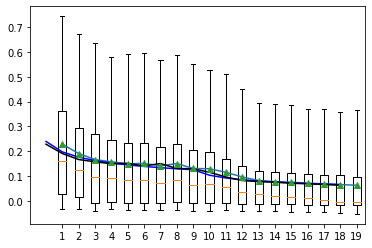

In [6]:
figname = "../article/main_figures/fig3/read_correl.pdf"
ranges_bins, list_vals, ranges, means = correl_dist("../data/read_correl_oct.tsv", 
                                                    edsites_oct,
                                                    figname,
                                                    pval_thr = 0.01, 
                                                    el_both_thr = 0, 
                                                    el_max_thr = 0,
                                                    log_fig = False)

-0.29782093785825264 -1.3944487674427135


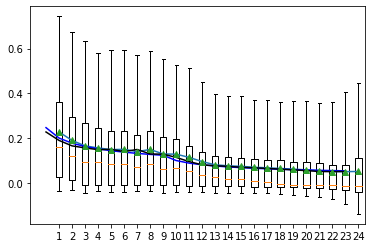

-0.15893752217604348 -0.8482604488216205


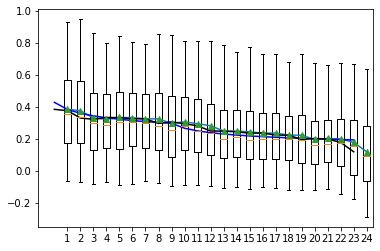

-0.13015813948957405 -0.6805851566183618


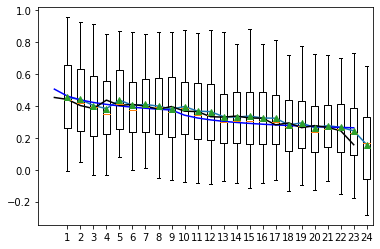

In [28]:
figname = "../article/suppl_figures/An8_editing_corr/read_correl_EL0.pdf"

ranges_bins, list_val_0, ranges, means = correl_dist("../data/read_correl_oct.tsv", 
                                     edsites_oct,
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 0, 
                                     el_max_thr = 0)

figname = "../article/suppl_figures/An8_editing_corr/read_correl_EL5.pdf"
ranges_bins, list_vals_5, ranges, means = correl_dist("../data/read_correl_oct.tsv", 
                                     edsites_oct, 
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 5, 
                                     el_max_thr = 5)

figname = "../article/suppl_figures/An8_editing_corr/read_correl_EL10.pdf"
ranges_bins, list_vals_10, ranges, means = correl_dist("../data/read_correl_oct.tsv", 
                                     edsites_oct,
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 10, 
                                     el_max_thr = 10)

In [29]:
for i in range(len(list_val_0)):
    t, p = stats.mannwhitneyu(list_val_0[i],list_vals_5[i])
    print("0-5", np.mean(list_val_0[i]), np.mean(list_vals_5[i]), p)
    t, p = stats.mannwhitneyu(list_vals_5[i],list_vals_10[i])
    print("5-10", np.mean(list_vals_5[i]), np.mean(list_vals_10[i]), p)
    t, p = stats.mannwhitneyu(list_val_0[i],list_vals_10[i])
    print("0-10", np.mean(list_val_0[i]), np.mean(list_vals_10[i]), p)

0-5 0.22867676994899463 0.3842101258826143 2.363545222904947e-171
5-10 0.3842101258826143 0.4540059605726045 6.562412279393765e-16
0-10 0.22867676994899463 0.4540059605726045 7.383733841680844e-191
0-5 0.19109651971825334 0.3757828850254404 8.660021605052941e-78
5-10 0.3757828850254404 0.44174429163215195 2.9911371831148444e-05
0-10 0.19109651971825334 0.44174429163215195 2.176828001444517e-68
0-5 0.16691178149519878 0.3298724091297738 1.960925649327782e-114
5-10 0.3298724091297738 0.4033492153192123 1.1516854753266586e-09
0-10 0.16691178149519878 0.4033492153192123 7.72763957094689e-107
0-5 0.15771964970482644 0.3220183790981185 1.3983420661341772e-66
5-10 0.3220183790981185 0.38435149775497335 9.276548734447067e-05
0-10 0.15771964970482644 0.38435149775497335 1.4042192048507964e-52
0-5 0.15020312702489788 0.333717549040313 8.251380238705632e-58
5-10 0.333717549040313 0.437445408078643 1.7568983535110065e-07
0-10 0.15020312702489788 0.437445408078643 7.787158285622974e-59
0-5 0.151448

In [8]:
edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
edsites_bim = read_edsite_crd_file("../data/editing_sites_bim_plus.txt", syn_nsyn = None)
edsites_sep = read_edsite_crd_file("../data/editing_sites_sep_plus.txt", syn_nsyn = None)
edsites_squ = read_edsite_crd_file("../data/editing_sites_squ_plus.txt", syn_nsyn = None)

-0.27947689571093487 -1.4278670031911243
R [[1.         0.99014184]
 [0.99014184 1.        ]] R^2 [[1.         0.98038087]
 [0.98038087 1.        ]]


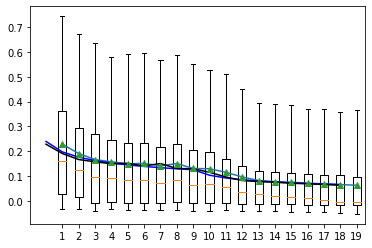

-0.259187332198172 -1.2418484070613798
R [[1.         0.98607097]
 [0.98607097 1.        ]] R^2 [[1.         0.97233597]
 [0.97233597 1.        ]]


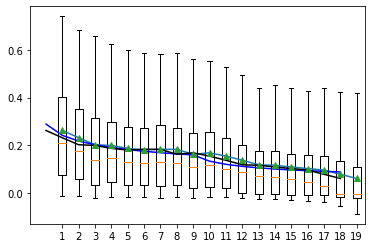

-0.2270983738786746 -1.3951469997490373
R [[1.         0.99063725]
 [0.99063725 1.        ]] R^2 [[1.         0.98136215]
 [0.98136215 1.        ]]


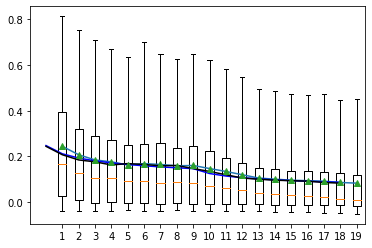

-0.22064552210787433 -1.4952069636874619
R [[1.         0.98692187]
 [0.98692187 1.        ]] R^2 [[1.         0.97401477]
 [0.97401477 1.        ]]


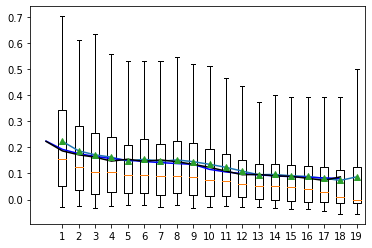

In [9]:
figname = "../article/suppl_figures/An8_editing_corr/oct.pdf"
ranges_bins, list_val_0, ranges, means = correl_dist("../data/read_correl_oct.tsv", 
                                     edsites_oct,
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 0, 
                                     el_max_thr = 0)

figname = "../article/suppl_figures/An8_editing_corr/bim.pdf"
ranges_bins, list_val_0, ranges, means = correl_dist("../data/read_correl_bim.tsv", 
                                     edsites_bim,
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 0, 
                                     el_max_thr = 0)

figname = "../article/suppl_figures/An8_editing_corr/sep.pdf"
ranges_bins, list_val_0, ranges, means = correl_dist("../data/read_correl_sep.tsv", 
                                     edsites_sep,
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 0, 
                                     el_max_thr = 0)

figname = "../article/suppl_figures/An8_editing_corr/squ.pdf"
ranges_bins, list_val_0, ranges, means = correl_dist("../data/read_correl_squ.tsv", 
                                     edsites_squ,
                                     figname,
                                     pval_thr = 0.01, 
                                     el_both_thr = 0, 
                                     el_max_thr = 0)

In [10]:
from scipy.stats import ttest_ind

ttest_ind([1,2,3], [101, 102, 103])

Ttest_indResult(statistic=-122.47448713915891, pvalue=2.6654818961636016e-08)